## Greek Run
Usare numpy e matplotlib per simulare la corsa greca.
La corsa ha le seguenti regole:
1. ci sono 5 giocatori che cominciano nelle posizioni 0, 20, 40, 60, 80
2. i giocatori si muovono di un passo ogni turno
3. i giocatori 1, 2, 3, 4 si muovono verso destra, il giocatore 5 si muove verso sinistra
4. se due giocatori si incontrano, cambiano direzione
5. se un giocatore esce dall'area di gioco (0, 100) ha finito la corsa
6. l'ultimo a finire, perde

In [176]:
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import time

In [177]:
#Parte 1
#Creare le matrici con le posizioni, le direzioni e se sono ancora in gioco
#Assegnare a ogni giocatore una posizione iniziale e una direzione iniziale (1 verso destra, -1 verso sinistra)

posizioni = np.array([0, 20, 40, 60, 80])
direzioni = np.array([1, 1, 1, 1, -1])
ingioco = np.ones(5, dtype = bool) #np.array([True, True, True, True, True])
colori = ['r', 'g', 'b', 'y', 'm']
segnaposti = ['o', 'v', '^', '<', '>']

Text(0.5, 0.98, 'Greek Run')

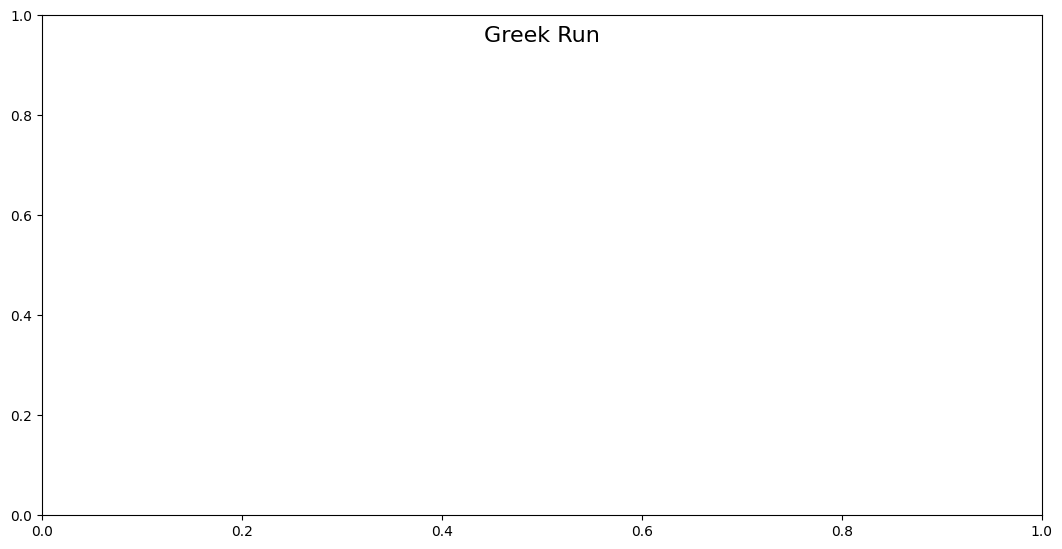

In [178]:
#Parte 2
#Inizializzare il grafico (l'area di gioco)
fig = plt.figure(figsize = (10, 5))
ax = fig.add_axes([0, 0, 1, 1])
fig.suptitle('Greek Run', fontsize = 16)

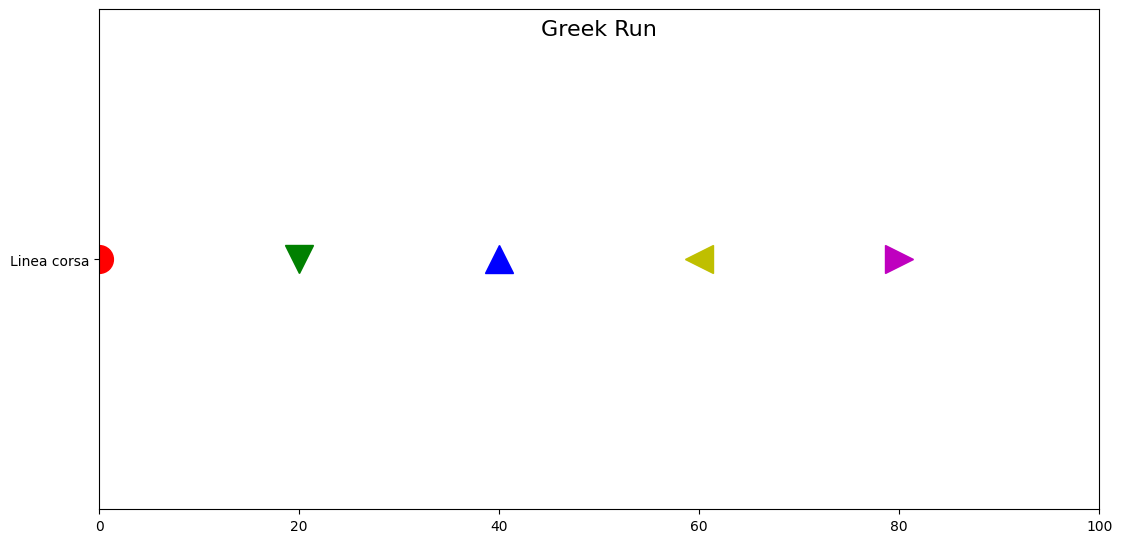

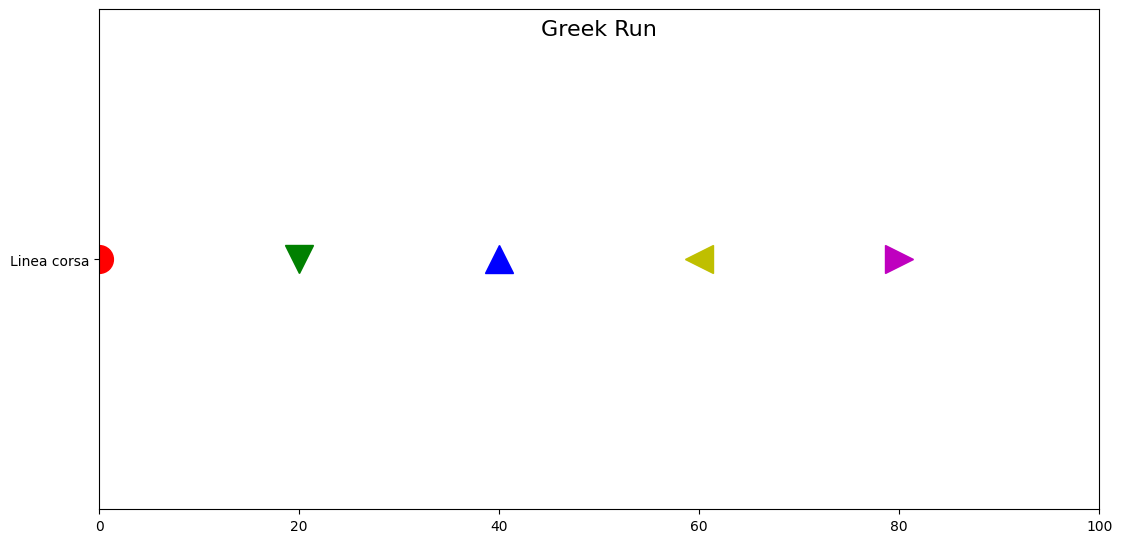

In [179]:
#Parte 3
#Usare la funzione zip per creare il grafico
#Useremo la funzione plot per creare i punti
#Imposteremo il grafico con xlim (0, 100) e ylim (-2, 2)

def plot_corsa():
    for giocatore in zip(posizioni, colori, segnaposti):
        ax.plot(giocatore[0], 0, color = giocatore[1], marker = giocatore[2], markersize = 20)
        ax.set_xlim(0, 100)
        ax.set_ylim(-2, 2)
        ax.set_yticks([0]) #Mette una tacca sull'asse y, dove y = 0
        ax.set_yticklabels(['Linea corsa'])
    display.clear_output(wait = True)
    display.display(fig)

plot_corsa()
fig

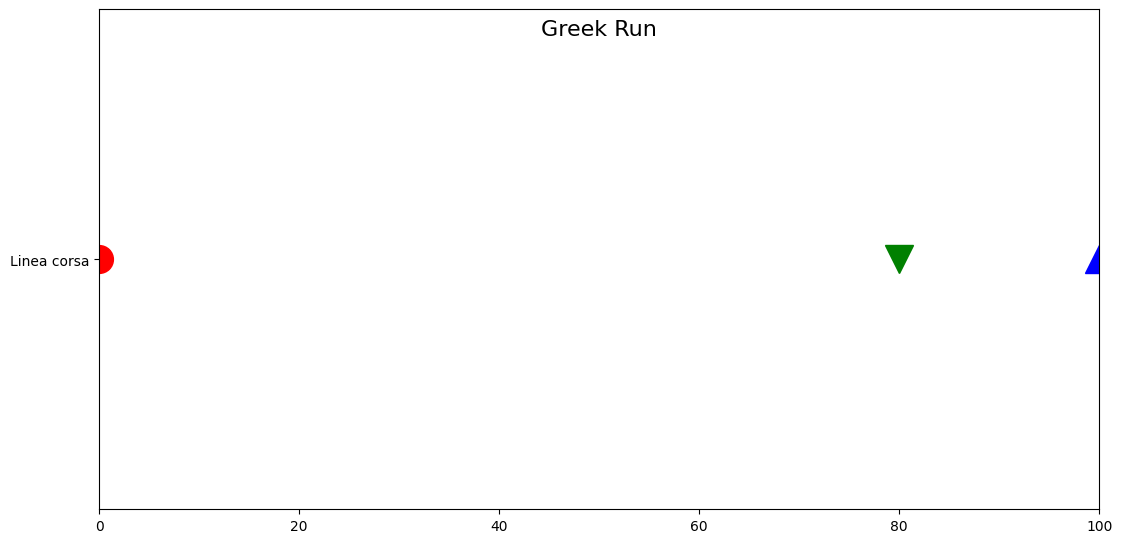

In [180]:
#Parte 4
#Fare avanzare i giocatori rispettando la direzione
#Continuare finchè resta un solo giocatore attivo
contapassi = 0

while len(ingioco[ingioco == True]) > 1:
    contapassi += 1
    posizioni += direzioni
    ingioco[posizioni >= 100] = False #Se la posizione è maggiore/uguale di 100, il giocatore è fuori
    ingioco[posizioni <= 0] = False #Se la posizione è minore di 0, il giocatore è fuori
    
    for i in range(len(posizioni) -1):
        if posizioni[i] == posizioni[i+1]:
            direzioni[i] = -direzioni[i]
            direzioni[i+1] *= -1
    
    ax.clear()

    plot_corsa()
    time.sleep(0.1)


In [181]:
#ingioco.tolist.index(True) Restituisce l'indice del giocatore in gioco
#Notifica giocatore sconfitto
for i in range(len(ingioco)):
    if ingioco[i] == True:
        print('Il giocatore', i+1, 'Ha perso')
        break

if direzioni[i] == 1:
    passi_restanti = 100 - posizioni[i]
else:
    passi_restanti = posizioni[i]

totale_passi = contapassi + passi_restanti


print(f'La corsa è durata {totale_passi} passi') #f sta per formattazione
print(f'Il giocatore {i+1} è rimasto a {passi_restanti} passi dalla fine ed è durata {totale_passi // 60}:{totale_passi%60} minuti')

tot_min = totale_passi // 60
import datetime
timedelta = datetime.timedelta(seconds = float(totale_passi))
print(f'La corsa è durata {timedelta}')

Il giocatore 2 Ha perso
La corsa è durata 100 passi
Il giocatore 2 è rimasto a 20 passi dalla fine ed è durata 1:40 minuti
La corsa è durata 0:01:40
